In [1]:
import numpy as np
import urllib.request
import gzip
import os
import tensorflow as tf
from tensorflow.keras import layers, models

# Function to download and extract MNIST dataset
def download_mnist():
    base_url = "http://yann.lecun.com/exdb/mnist/"
    files = ["train-images-idx3-ubyte.gz", "train-labels-idx1-ubyte.gz",
             "t10k-images-idx3-ubyte.gz", "t10k-labels-idx1-ubyte.gz"]

    for file in files:
        url = base_url + file
        filename = os.path.join(os.getcwd(), file)
        urllib.request.urlretrieve(url, filename)

# Function to load MNIST data
def load_mnist():
    # Download MNIST dataset if not already downloaded
    if not all(os.path.exists(file) for file in ["train-images-idx3-ubyte.gz", "train-labels-idx1-ubyte.gz",
                                                 "t10k-images-idx3-ubyte.gz", "t10k-labels-idx1-ubyte.gz"]):
        download_mnist()

    # Load training images
    with gzip.open("train-images-idx3-ubyte.gz", "rb") as f:
        train_images = np.frombuffer(f.read(), dtype=np.uint8, offset=16).reshape(-1, 28, 28)

    # Load training labels
    with gzip.open("train-labels-idx1-ubyte.gz", "rb") as f:
        train_labels = np.frombuffer(f.read(), dtype=np.uint8, offset=8)

    # Load test images
    with gzip.open("t10k-images-idx3-ubyte.gz", "rb") as f:
        test_images = np.frombuffer(f.read(), dtype=np.uint8, offset=16).reshape(-1, 28, 28)

    # Load test labels
    with gzip.open("t10k-labels-idx1-ubyte.gz", "rb") as f:
        test_labels = np.frombuffer(f.read(), dtype=np.uint8, offset=8)

    return train_images, train_labels, test_images, test_labels

# Function to flatten and normalize images
def preprocess_images(images):
    # Flatten images
    flattened_images = images.reshape(images.shape[0], -1)

    # Normalize pixel values to be between 0 and 1
    normalized_images = flattened_images / 255.0

    return normalized_images

# Load MNIST data
train_images, train_labels, test_images, test_labels = load_mnist()

# Preprocess training and testing images
train_images = preprocess_images(train_images)
test_images = preprocess_images(test_images)

# Print the shapes of the preprocessed data
print("Training images shape:", train_images.shape)
print("Training labels shape:", train_labels.shape)
print("Testing images shape:", test_images.shape)
print("Testing labels shape:", test_labels.shape)


Training images shape: (60000, 784)
Training labels shape: (60000,)
Testing images shape: (10000, 784)
Testing labels shape: (10000,)


In [3]:
# Design the neural network model with dropout
model_with_dropout = models.Sequential()

# Flatten layer to transform input images (28 x 28) to a vector (784,)
model_with_dropout.add(layers.Flatten(input_shape=(784,)))

# Hidden layer with 128 neurons and ReLU activation, including dropout
model_with_dropout.add(layers.Dense(128, activation='relu'))
model_with_dropout.add(layers.Dropout(0.5))  # Dropout layer with 50% deactivation rate

# Output layer with 10 neurons for digit classification and softmax activation
model_with_dropout.add(layers.Dense(10, activation='softmax'))

# Compile the model with specified configurations
model_with_dropout.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                          loss='sparse_categorical_crossentropy',
                          metrics=['accuracy'])

# Print the model summary
model_with_dropout.summary()

# Train the model with dropout
history_with_dropout = model_with_dropout.fit(train_images, train_labels, epochs=10, batch_size=128, validation_split=0.2)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
375/375 [==============================] - 1s 3ms/step - loss: 0.5536 - accuracy: 0.8340 - val_loss: 0.2276 - val_accuracy: 0.9386
Epoc

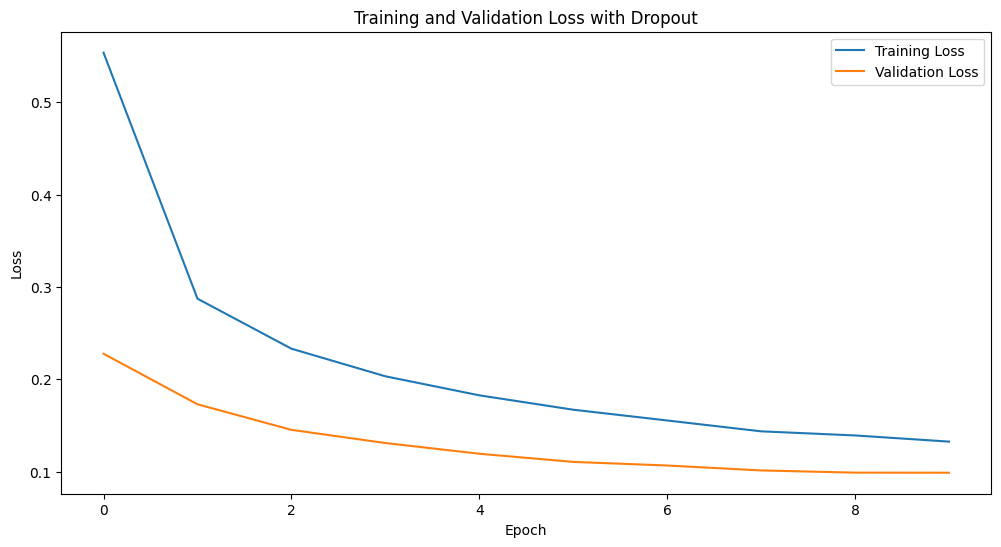

In [4]:
import matplotlib.pyplot as plt

# Plot training and validation loss curves for model with dropout
plt.figure(figsize=(12, 6))

plt.plot(history_with_dropout.history['loss'], label='Training Loss')
plt.plot(history_with_dropout.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss with Dropout')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Display the plot
plt.show()


Comparing the loss curve plot from Part V (without dropout) to the loss curve plot with dropout can provide insights into the effectiveness of the dropout layer in the network. Here are some observations and insights:

1. **Overfitting Reduction:**
   - The loss curve plot with dropout might show less divergence between the training and validation loss curves compared to the plot without dropout.
   - Dropout tends to act as a regularization technique, preventing the model from overfitting by randomly deactivating some neurons during training. This regularization effect might result in a smaller gap between training and validation losses.

2. **Smoothing of Loss Curves:**
   - The loss curve with dropout might appear smoother or exhibit fewer erratic fluctuations compared to the curve without dropout.
   - Dropout introduces noise into the network during training, leading to a smoother convergence of the loss curves.

3. **Better Generalization:**
   - The model with dropout may demonstrate improved generalization to unseen data (test/validation) compared to the model without dropout.
   - Dropout helps prevent the network from relying too much on specific features or neurons, forcing it to learn more robust and generalizable features.

4. **Overall Effectiveness:**
   - The effectiveness of the dropout layer can be assessed by the extent to which it mitigates overfitting, as indicated by a reduced gap between training and validation losses.
   - If the dropout layer has effectively reduced overfitting, the model's performance on unseen data, such as the validation set or test set, might improve or show more stable performance across epochs.

By comparing the loss curves between the model trained with and without dropout, you can evaluate the effectiveness of the dropout layer in addressing overfitting and improving the model's generalization performance. The dropout layer aims to enhance the network's robustness and prevent it from memorizing the training data, ultimately aiding in better generalization to new, unseen data.